# Employee Attrition Prediction
Employee attrition is downsizing in any organization where employees resign. Employees are valuable assets of any organization. It is necessary to know whether the employees are dissatisfied or whether there are other reasons for leaving their respective jobs.

[Source link](https://thecleverprogrammer.com/2020/11/21/employee-attrition-prediction-with-python/)

## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Loading the dataset

In [2]:
pd.options.display.max_columns = 50
df = pd.read_csv("data/Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Information of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Drop columns with single value

In [4]:
df["StandardHours"].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [5]:
df["Over18"].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [6]:
df = df.drop(columns=["StandardHours", "Over18"])
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Visualizing the categorical features

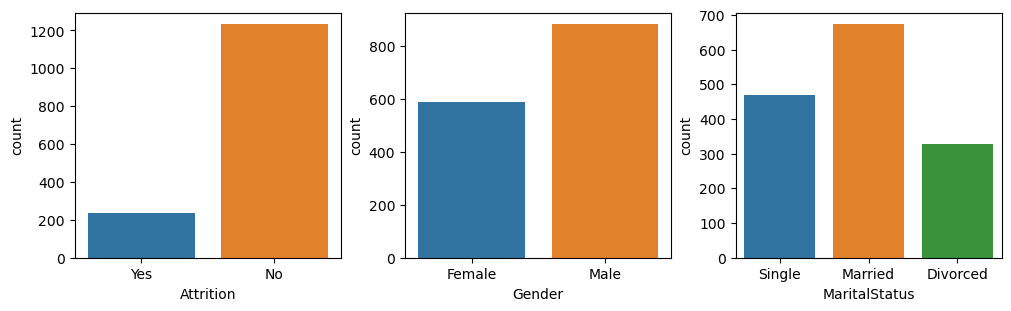

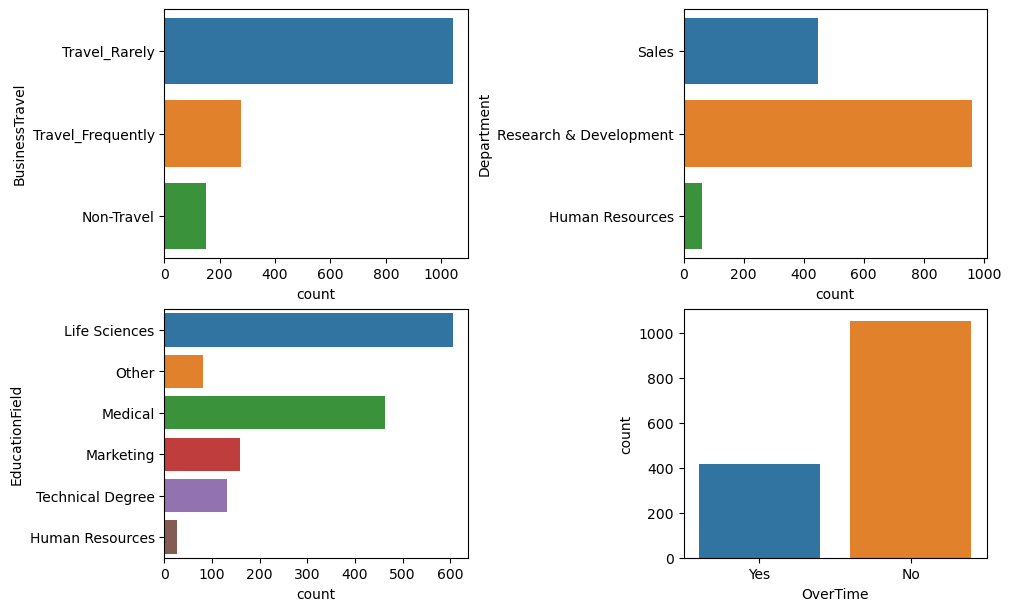

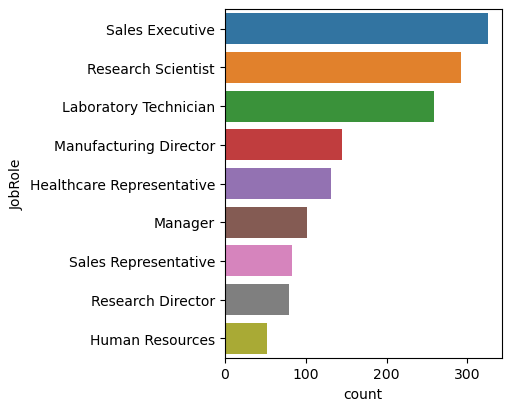

In [7]:
_, axes = plt.subplots(
    1, 3,
    figsize=(10, 3),
    layout="constrained",
)
sns.countplot(df, x="Attrition", ax=axes[0])
sns.countplot(df, x="Gender", ax=axes[1])
sns.countplot(df, x="MaritalStatus", ax=axes[2])

_, axes = plt.subplots(
    2, 2,
    figsize=(10, 6),
    layout="constrained",
)
sns.countplot(df, y="BusinessTravel", ax=axes[0, 0])
sns.countplot(df, y="Department", ax=axes[0, 1])
sns.countplot(df, y="EducationField", ax=axes[1, 0])
sns.countplot(df, x="OverTime", ax=axes[1, 1])

_, axes = plt.subplots(
    1,
    figsize=(5, 4),
    layout="constrained",
)
sns.countplot(df, y="JobRole", ax=axes);

## Visualizing the some numerical features

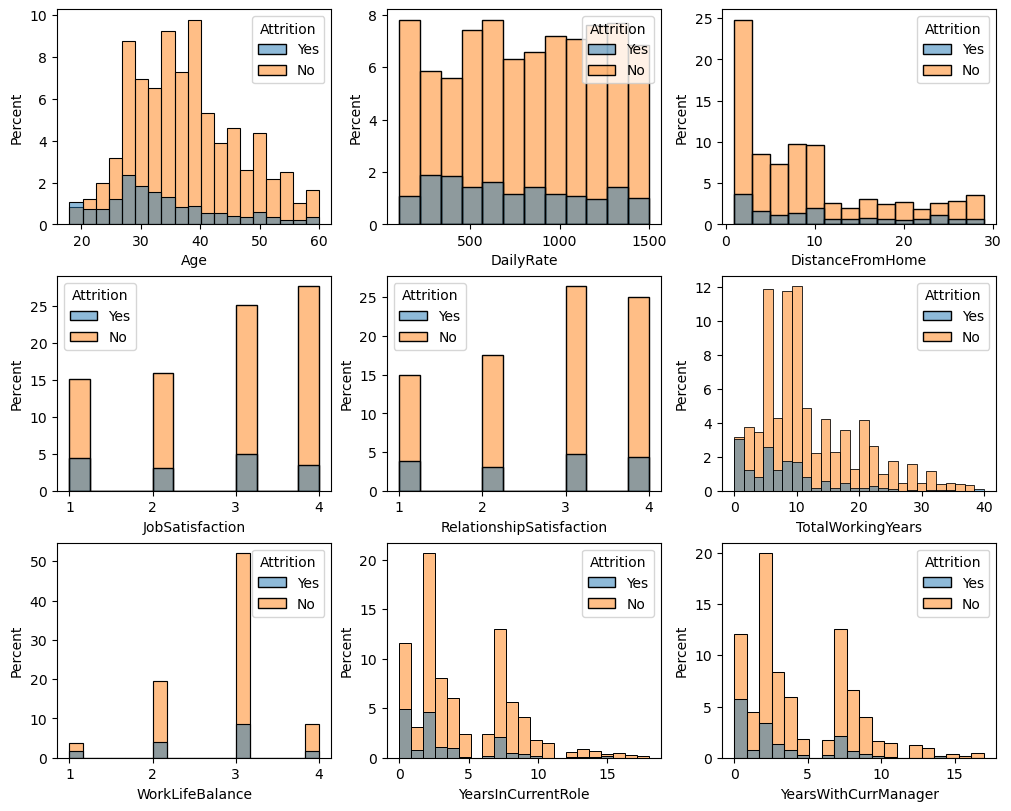

In [8]:
fig, axes = plt.subplots(
    3, 3, figsize=(10, 8),
    layout="constrained",
)
sns.histplot(df, x="Age", hue="Attrition", stat="percent", ax=axes[0, 0])
sns.histplot(df, x="DailyRate", hue="Attrition", stat="percent", ax=axes[0, 1])
sns.histplot(df, x="DistanceFromHome", hue="Attrition", stat="percent", ax=axes[0, 2])
sns.histplot(df, x="JobSatisfaction", hue="Attrition", stat="percent", ax=axes[1, 0])
sns.histplot(df, x="RelationshipSatisfaction", hue="Attrition", stat="percent", ax=axes[1, 1])
sns.histplot(df, x="TotalWorkingYears", hue="Attrition", stat="percent", ax=axes[1, 2])
sns.histplot(df, x="WorkLifeBalance", hue="Attrition", stat="percent", ax=axes[2, 0])
sns.histplot(df, x="YearsInCurrentRole", hue="Attrition", stat="percent", ax=axes[2, 1])
sns.histplot(df, x="YearsWithCurrManager", hue="Attrition", stat="percent", ax=axes[2, 2]);

## Finding Correlation

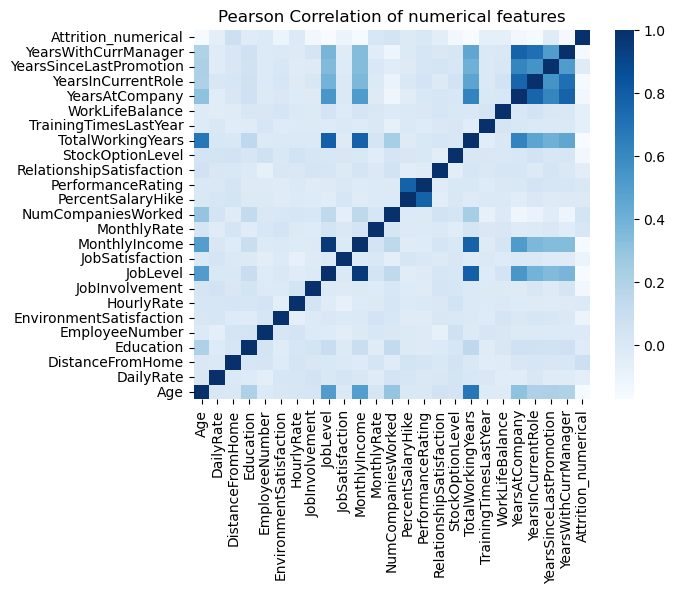

In [9]:
target_map = {"Yes":1, "No":0}
# Use the pandas apply method to numerically encode our attrition target variable
df["Attrition_numerical"] = df["Attrition"].map(target_map)
df = df.drop(columns=["Attrition"])

numerical = [
    "Age", "DailyRate", "DistanceFromHome",
    "Education", "EmployeeNumber", "EnvironmentSatisfaction",
    "HourlyRate", "JobInvolvement", "JobLevel", "JobSatisfaction",
    "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked",
    "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction",
    "StockOptionLevel", "TotalWorkingYears",
    "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany",
    "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager",
    "Attrition_numerical",
]
ax = sns.heatmap(df[numerical].astype("float").corr(), cmap="Blues")
ax.invert_yaxis()
plt.title("Pearson Correlation of numerical features");

**Result:** From the correlation plot, we can see that a lot of our columns appear to be poorly correlated to each other.

## Feature Engineering

### Converting categorical features to numerical

In [10]:
df_cat = df.select_dtypes(include=["object"])
categorical_columns = df_cat.columns
df_cat = pd.get_dummies(df_cat, drop_first=True, dtype="int")
df_cat.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


### Dropping categorical columns and concating numeral features and converted categorical features

In [11]:
df = df.drop(columns=categorical_columns)
df = pd.concat((df, df_cat), axis="columns")
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


### Extract matrix of features and labels

In [12]:
X = df.drop(columns=["Attrition_numerical"]).values
y = df["Attrition_numerical"].values

print(f"X_data {X.shape}")
print(f"y {y.shape}")

X_data (1470, 46)
y (1470,)


## Creating the machine learning model

### Splitting the dataset to train and test

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0,
)

print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

X_train (1176, 46)
X_test (294, 46)
y_train (1176,)
y_test (294,)


### Checking the training set balance

In [14]:
n = len(y_train)
n_ones = y_train.sum()
print(f"number of 1 values in y_train: {n_ones}")
print(f"number of 0 values in y_train: {n - n_ones}")

number of 1 values in y_train: 188
number of 0 values in y_train: 988


Because the training set is not balanced, we can use one oversampling method

In [15]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state=0)
X_train_smote, y_train_smote = oversampler.fit_resample(X_train, y_train)

print(f"X_train_smote {X_train_smote.shape}")
print(f"y_train_smote {y_train_smote.shape}")

n = len(y_train_smote)
n_ones = y_train_smote.sum()
print(f"number of 1 values in y_train: {n_ones}")
print(f"number of 0 values in y_train: {n - n_ones}")

X_train_smote (1976, 46)
y_train_smote (1976,)
number of 1 values in y_train: 988
number of 0 values in y_train: 988


### Training the Logistic Regression model

In [16]:
from sklearn.linear_model import LogisticRegression

rf = LogisticRegression(C=40, solver="liblinear")
rf.fit(X_train_smote, y_train_smote)

LogisticRegression(C=40, solver='liblinear')

### Predicting the test set

In [17]:
y_pred = rf.predict(X_test)
result = pd.DataFrame({"Actual": y_test, "Predict" : y_pred})
result.head(10)

,Actual,Predict
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,1,1
7,0,0
8,0,0
9,1,0


### Evaluating the model


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       245
           1       0.59      0.53      0.56        49

    accuracy                           0.86       294
   macro avg       0.75      0.73      0.74       294
weighted avg       0.86      0.86      0.86       294



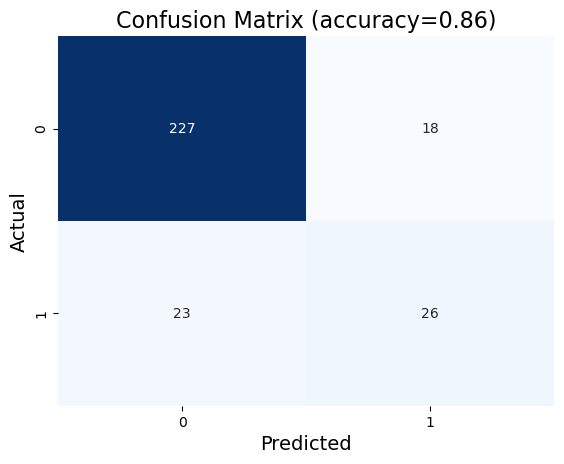

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False, fmt="d")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title(f"Confusion Matrix (accuracy={accuracy:.2f})", fontsize=16);